<div style="text-align: center;">
    <h1>Analysis of House Sales in Northwestern County</h1>
    <img src="./images/housing.png" style="width: 80%">    
</div>




## Project Overview
This project analyzes the various home characteristics that could affect the price of a house unit.I use regression analysis modeling on the King County data to get the best house price prediction features that can be used to predict the prices of the houses within North Western County and by what amount.




## Business Problem
Housing business for home owners is not doing quite well in Nothwestern county. A better marketing strategy that would lead to increased house sales needs to be developed.I use the data from King County Housing Authority to perform regression analysis so as to come up with the insights on the features that can affect or increase house sales.
Some of the questions I seek to answer are as below:
* Does the overall condition of the house affect its sale price?
* Does the overall grade of the house affect the sale price
* Is the age of the house an important factor to consider while selling the house?
* Does the size of the living room affect the pricing?
* Does the number of bedrooms or bathrooms affect the sale price of a house?
* Do houses with water fronts escalate the price of houses?
  


## Data Understanding
The data for this analysis has been sourced from an existing dataset in Kings County Housing Authority.It is located in the data/kc_house_data.csv, with columns descriptions in data/column_names.md.Every column in this dataset represents a home  that was sold through Kings County Housing Authority. The reqirements in this section involve loading the data using the relevant libraries, explore the data distributions, check the data types, explore correlations and feature engineering.
The features to focus on are as below as they are theones that determine the house prices in Kings County Housing Authority:
* **price:** - Sale price of the house in dollars(prediction target)
* **grade:** - Overall grade given to the housing unit, based on King County grading system
* **condition:** - How good the house condition is ( Overall )
* **yr_built** - The year the house was built
* **bedrooms** -The number of bedrooms the house has
* **bathrooms** - The number of bathrooms
* **sqft_living** - The House’s Yard Square-footage
* **sqft_lot** - footage of the lot
* **floors** - floors (levels) in house
* **waterfront** - House which has a view to a waterfront





###  Load the dataset using Pandas

In [2]:
#import pandas to load the data
import pandas as pd
#import numpy for mathematical calculations
import numpy as np
#import matplotlib for visualization
import matplotlib.pyplot as plt
#set %matplotlib inline so the graphs will display immediately below the cell that creates them
%matplotlib inline
#import seaborn for visualization
import seaborn as sns
#use ggplot
plt.style.use('ggplot')
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
#open the csv file using pandas and assign it to a dataframe
kc_house_df = pd.read_csv('data/kc_house_data.csv', index_col=0)

#inspect the contents of the dataframe

kc_house_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


### Inspect the contents of the dataframe

In [4]:
#visualize the first 5 rows of the dataset
kc_house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#check the general structure of the data
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [6]:
#the data contains 20 columns and 21,597 rows.
# some columns such as data have wrong data types

In [7]:
# Get the summary statistics of the data
kc_house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Preparation

The dataset has a total of  21,597 observations with 20 columns to analyze. But some of its variables may not be in accordance with the main features highlighed in the data understanding section. We will therefore drop columns such as views, qft_above, sqft_basement, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15 because these variables do not have much effect on the house pricing in Kings County.


In [8]:
#drop irrelevant columns
kc_house_df = kc_house_df.drop(['date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15'], axis=1)


In [9]:
#reset the dataframe index
kc_house_df.reset_index(inplace=True)

In [10]:
#recheck the general structure of the dataframe
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


### Check for duplicates

Check whether there are any duplicated values in the data based on the house id which needs to be unique


In [11]:
#check for duplicates
kc_house_df.duplicated(subset=['id'])

    

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

In [12]:
# There are no duplicates in our data

### Check for Missing values
Investigate the data to see whether it contains any null values

In [13]:
#check for  missing values in df_titles
kc_house_df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [14]:
# it's noted that waterfront has 2376 missing values.
kc_house_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [15]:
#check the percentage of missing data
print("percentage of waterfront missing data compared to the whole dataset:",(kc_house_df['waterfront'].isna().sum())*100 / len(kc_house_df))


percentage of waterfront missing data compared to the whole dataset: 11.00152798999861


In [16]:
#we see that the missing values in waterfront constitutes 11.0% of the whole dataframe
# Since this is not quite a large number of data that will be lost out of the 21597 rows, the missing values will be dropped.

kc_house_df_clean = kc_house_df.dropna()



In [17]:
#confirm there are no null values
kc_house_df_clean.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [18]:
# there no more null values in our dataset.

# check the structure of the dataset again
kc_house_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           19221 non-null  int64  
 1   price        19221 non-null  float64
 2   bedrooms     19221 non-null  int64  
 3   bathrooms    19221 non-null  float64
 4   sqft_living  19221 non-null  int64  
 5   sqft_lot     19221 non-null  int64  
 6   floors       19221 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    19221 non-null  int64  
 9   grade        19221 non-null  int64  
 10  yr_built     19221 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [19]:
#check the data summary statistics again
kc_house_df_clean.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,1.922100e+04,1.922100e+04,19221.000000,19221.000000,19221.000000,1.922100e+04,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000
mean,4.592301e+09,5.416398e+05,3.374642,2.117072,2082.420894,1.507376e+04,1.495031,0.007596,3.409968,7.661048,1971.039800
std,2.876995e+09,3.722478e+05,0.928539,0.769576,922.544859,4.081729e+04,0.540155,0.086825,0.650280,1.175998,29.384666
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.124049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.334501e+09,6.440000e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


## Exploratory Analysis

Check the distribution of data and see if it meets the normality assumption of the linear regression


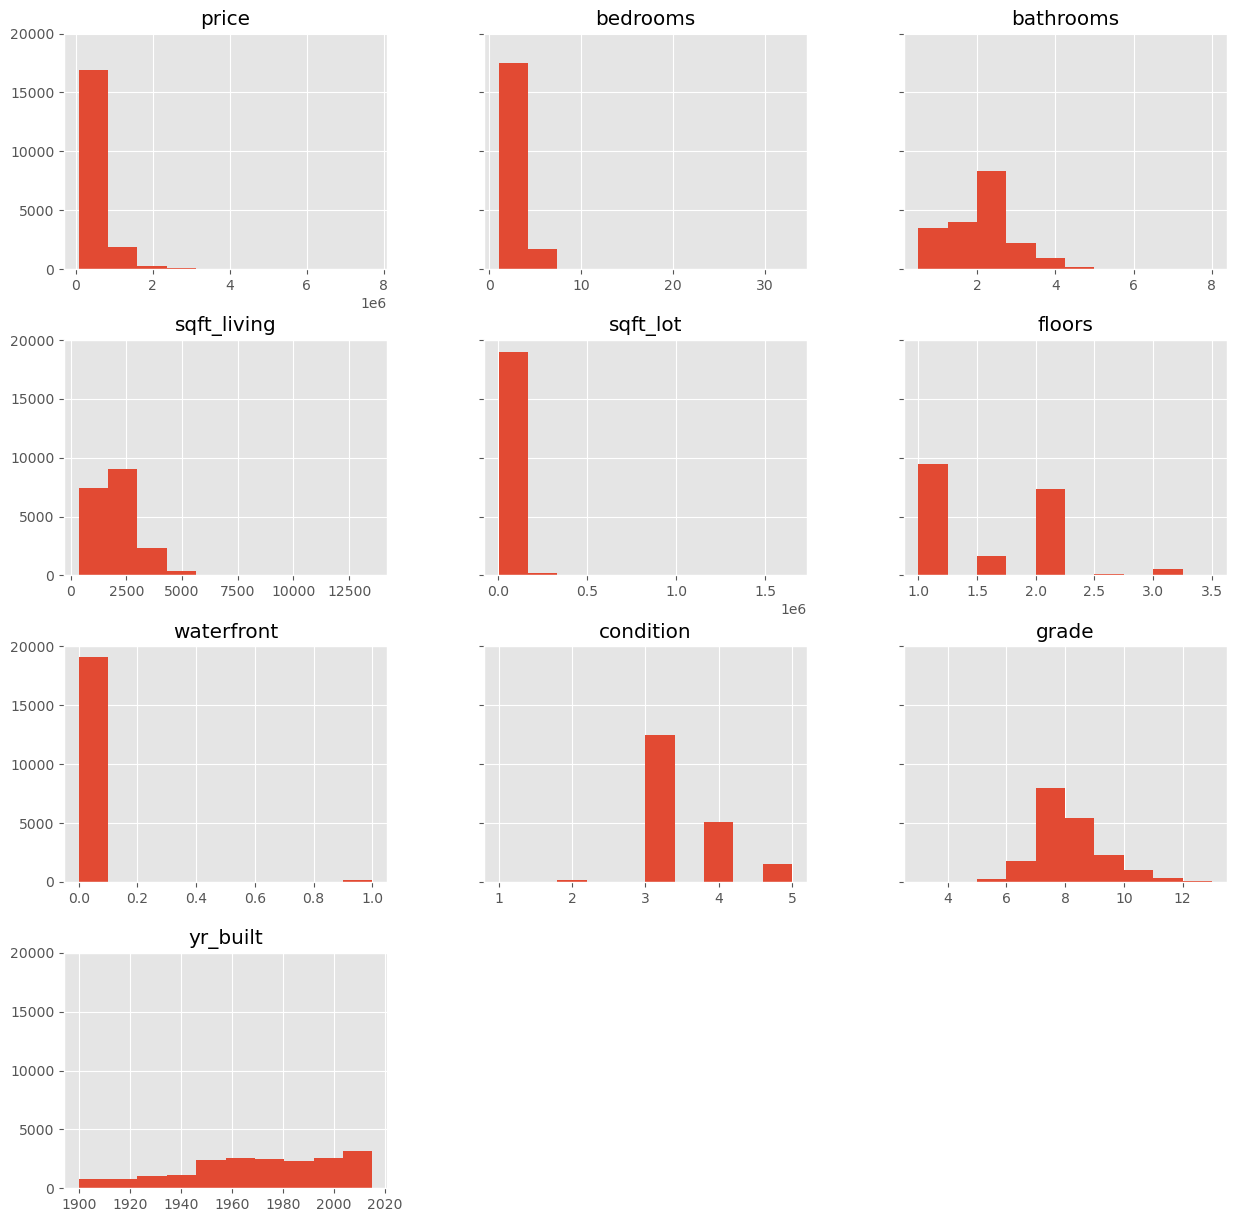

In [20]:
#drop the id column first
kc_house_df_clean.drop('id', axis=1, inplace=True)
kc_house_df_clean.hist(figsize=(15,15), sharey=True);


In [21]:
#we can see from the histograms that most columns are not normally  distributed and will need to be normalized 
# before they are fit into the training models 

## Correlatation between the predictors and  the dependent variable price

Here we will plot a heatmap 

In [22]:
#generate the correlation table
kc_house_df_clean.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.309651,0.527350,0.704652,0.087005,0.258277,0.276295,0.038037,0.667224,0.053525
bedrooms,0.309651,1.000000,0.516188,0.578211,0.029407,0.182396,-0.002386,0.025059,0.360014,0.157512
bathrooms,0.527350,0.516188,1.000000,0.756341,0.085094,0.506214,0.067282,-0.126427,0.666891,0.507014
sqft_living,0.704652,0.578211,0.756341,1.000000,0.173345,0.357184,0.110230,-0.057467,0.764053,0.317443
sqft_lot,0.087005,0.029407,0.085094,0.173345,1.000000,-0.007246,0.023143,-0.014113,0.114577,0.055873
floors,0.258277,0.182396,0.506214,0.357184,-0.007246,1.000000,0.021883,-0.263491,0.458117,0.490252
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.017642,0.087383,-0.026079
condition,0.038037,0.025059,-0.126427,-0.057467,-0.014113,-0.263491,0.017642,1.000000,-0.144513,-0.361984
grade,0.667224,0.360014,0.666891,0.764053,0.114577,0.458117,0.087383,-0.144513,1.000000,0.446299
yr_built,0.053525,0.157512,0.507014,0.317443,0.055873,0.490252,-0.026079,-0.361984,0.446299,1.000000


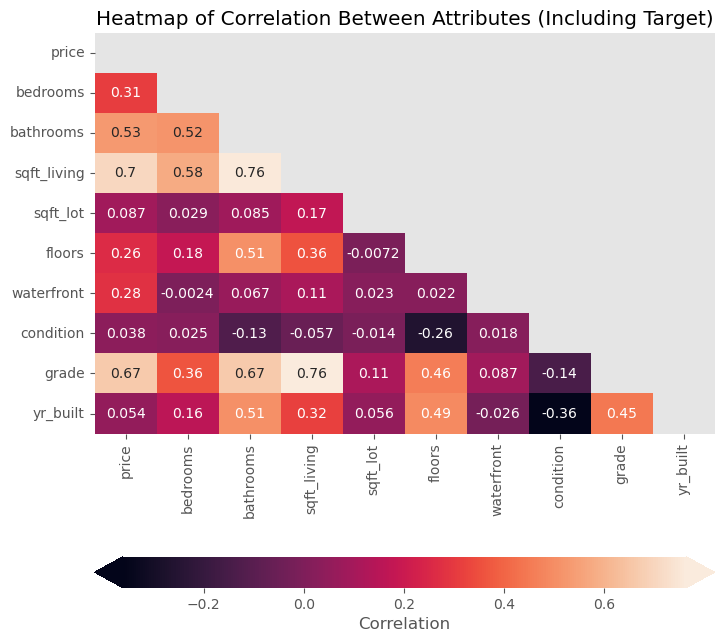

In [23]:
# Create a df with the target as the first column,
# then compute the correlation matrix
corr = kc_house_df_clean.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)")
fig.savefig('./images/heatmap');

From the above plot, we see that sqft_living is the most correlated to price,followed by grade, then number of bathrooms. 
We will plot scatter plot between the sqft_living and price to illustrate this. 

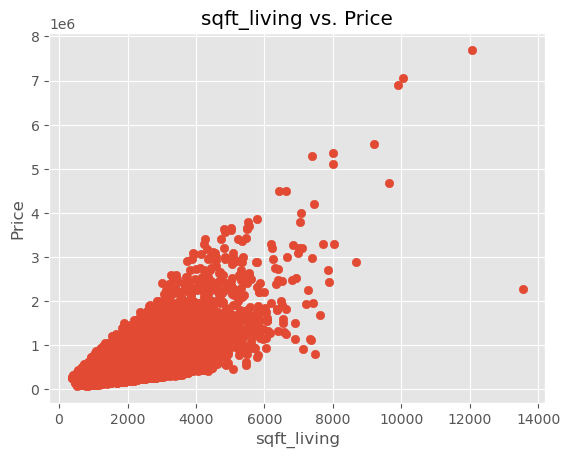

In [24]:
most_correlated_feature = 'sqft_living'
fig, ax = plt.subplots()

ax.scatter(kc_house_df_clean[most_correlated_feature],kc_house_df_clean['price'])
ax.set_xlabel('sqft_living')
ax.set_ylabel('Price')
ax.set_title('sqft_living vs. Price')
fig.savefig('./images/most_correlated');

The above plot shows strong positive a linear relationship between the house's sqft_living with the price. We can use  this predictor to create our initial model

### Data Transformation
split columns into numeric and categoricals

In [25]:
continuous = ['price', 'bedrooms',	'bathrooms', 'sqft_living',	'sqft_lot',	'floors', 'condition',	'grade','yr_built', 'waterfront']
# the main features dont contain the string values so we will skip onehotencoding in this project

Log and scale the selected continuous features

In [26]:
# Log transform and normalize
kch_cont = kc_house_df_clean[continuous]

log_names = [f'{column}_log' for column in kch_cont.columns]
kch_log = np.log(kch_cont +1)
kch_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

kch_log_norm = kch_log.apply(normalize)
preprocessed = kch_log_norm


Check the correlation matrix for for the log transformed and normalized features again.

In [27]:
#create a correlation table
preprocessed.corr()

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,condition_log,grade_log,yr_built_log,waterfront_log
price_log,1.000000,0.349234,0.533318,0.674968,0.137757,0.322695,0.041019,0.696381,0.080321,0.180524
bedrooms_log,0.349234,1.000000,0.538749,0.652204,0.194241,0.211454,0.028576,0.395496,0.190270,-0.007173
bathrooms_log,0.533318,0.538749,1.000000,0.766372,0.087959,0.519583,-0.115396,0.663793,0.529840,0.055331
sqft_living_log,0.674968,0.652204,0.766372,1.000000,0.324591,0.390738,-0.043753,0.746585,0.350543,0.083394
sqft_lot_log,0.137757,0.194241,0.087959,0.324591,1.000000,-0.218505,0.072236,0.167168,-0.003909,0.076468
floors_log,0.322695,0.211454,0.519583,0.390738,-0.218505,1.000000,-0.258792,0.470866,0.479889,0.022329
condition_log,0.041019,0.028576,-0.115396,-0.043753,0.072236,-0.258792,1.000000,-0.134603,-0.348196,0.016305
grade_log,0.696381,0.395496,0.663793,0.746585,0.167168,0.470866,-0.134603,1.000000,0.459572,0.078715
yr_built_log,0.080321,0.190270,0.529840,0.350543,-0.003909,0.479889,-0.348196,0.459572,1.000000,-0.025941
waterfront_log,0.180524,-0.007173,0.055331,0.083394,0.076468,0.022329,0.016305,0.078715,-0.025941,1.000000


In [28]:
#the most correlated feature after feature transformation is grade_log. 
# #We will use this column to create the baseline model

### Model preprocessing with Scikit-learn

The prediction target for this analysis is the sale price of a house unit, so we separate the data into X and y accordingly:

In [29]:
#split the data into predictors and target variable
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

Next, we separate the data into a train set and a test set prior to performing any preprocessing steps:

In [30]:
#import the train_test_split module from sklearn
from sklearn.model_selection import train_test_split
#split data into train, test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#check the shape of the train data

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# confirm we have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 14415 rows and 9 columns
y_train is a Series with 14415 values


## Building a Baseline Model
We'll build a linear regression model using just one feature(the most correlated feature(grade_log) with house price, which will serve as our baseline model:


In [31]:
#import the  Linear regression model from sklearn
from sklearn.linear_model import LinearRegression

#generate a model instance
baseline_model = LinearRegression()
#fit the model
baseline_model.fit(X_train, y_train)


We then evaluate our first model using cross_validate and ShuffleSplit, which essentially means that we perform 3 separate train-test splits
within our X_train and y_train, then we find both the train and the test scores for each.

In [32]:
#Evaluate the train and test scores for the baseline model
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[['grade_log']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.48584102884524566
Validation score: 0.48827211561374534


The model performance is at approximately 49%, similar to the validation score that is about  49% too. This can only predict the house price up to 50%.

We have to look for another approach to see whether our model performance improves

## Build a Model with all numeric Features considered

We explore the  scatter plots of all numeric features compared to our target  variable price
(except grade_log since we've already worked with it):

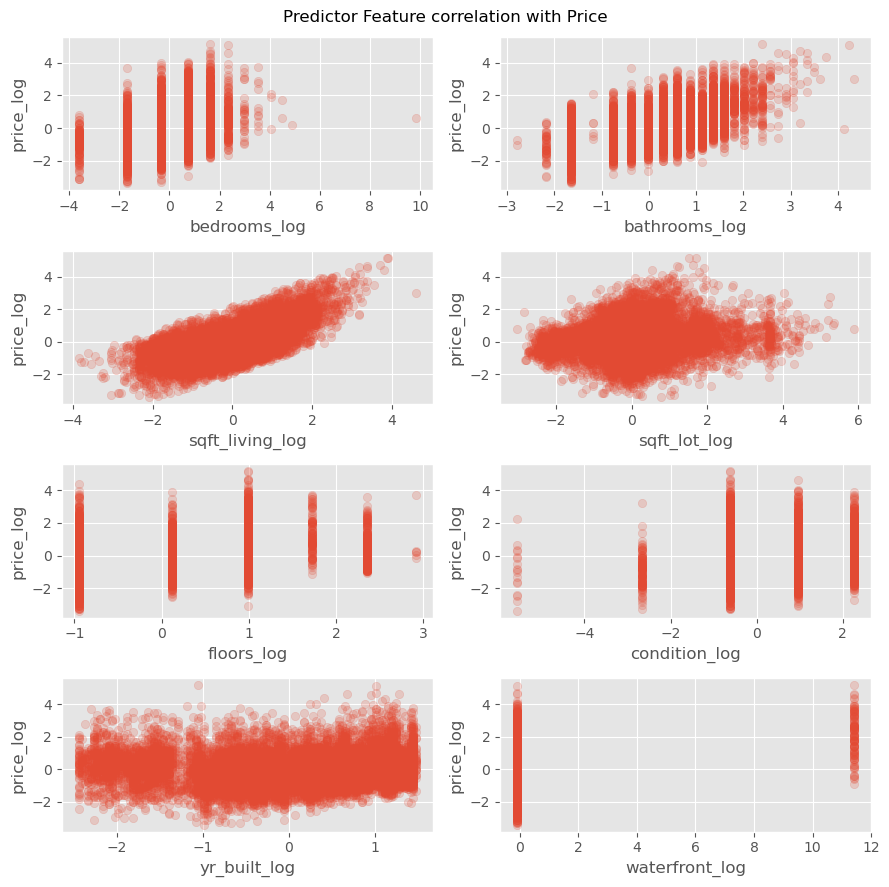

In [33]:
scatterplot_data = X_train.drop("grade_log", axis=1)

fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(9, 9))
fig.set_tight_layout(True)

for col, ax in zip(scatterplot_data.columns, axes.flatten()):
    ax.scatter(X_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price_log")
    plt.suptitle('Predictor Feature correlation with Price')
    fig.savefig('./images/numeric_scatter');

## Building and Evaluating the Second Model
In this model we consider all the numeric variable while developing an algorithm for this model

In [34]:
#instantiate the regression model
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6409278151759027
Validation score: 0.6526757710688096

Baseline Model
Train score:      0.48584102884524566
Validation score: 0.48827211561374534


The second model got much better scores on both the training data and the validation data. The performances for the training and testing data are still quite low 64% and 65% respectively ie less than 70%. We will try a third model to see whether our perfomances improve.


### Investigate for multicollinearity using StatsModels to fit and evaluate a linear regression model on the features used in our second model


In [35]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2898.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:40:26   Log-Likelihood:                -13068.
No. Observations:               14415   AIC:                         2.616e+04
Df Residuals:                   14405   BIC:                         2.623e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0009      0.005     -0.184      0.854      -0.011       0.009
bedrooms_log       -0.0979      0.007    -14.511      0.000      -0.111      -0.085
bathrooms_log       0.1074      0.009     11.776      0.000       0.090       0.125
sqft_living_log     0.3841      0.011     35.028      0.000       0.363       0.406
sqft_lot_log       -0.0607      0.006    -10.462      0.000      -0.072      -0.049
floors_log          0.0550      0.007      8.264      0.000       0.042       0.068
condition_log       0.0419      0.005      7.694      0.000       0.031       0.053
grade_log           0.5139      0.008     62.871      0.000       0.498       0.530
yr_built_log       -0.3372      0.007    -51.137      0.000      -0.350      -0.324
waterfront_log      0.0957      0.005     19.000      0.000       0.086       0.106
==============================================================================
Omnibus:                       72.420   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.502
Skew:                           0.006   Prob(JB):                     3.35e-23
Kurtosis:                       3.415   Cond. No.                         5.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above summary,we note that our features don't exhibit multicollinearity.Also checking on the on the p-values we see that all our features are statistically significant since all of them have a p-value (P>|t|) of less than 0.05.We therefore dont drop any of the features used in our second model.

### Selecting best regression Features using sklearn.feature_selection

We will use RFE("Recursive Feature Elimination") which repeatedly scores the model, finds and removes the feature with the lowest "importance", then scores the model again. If the new score is better than the previous score, it continues removing features until the minimum is reached. "CV" stands for "cross validation" here, and we can use the same splitter we have been using to test our model data so far.

Since RFE has a scaling property we will use data that has not been normalized. We will split the data into train and test sets again

In [36]:
#use kch_cont dataframe declared earlier since its features are yet to be transformed
kch_cont = kc_house_df_clean[continuous]
X_final = kch_cont.drop('price', axis=1)
y_final = kch_cont['price']

In [37]:
#import the train_test_split module from sklearn
from sklearn.model_selection import train_test_split
#split data into train, test sets with the same random state of 42 we used in earlier model data

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, random_state=42)

#check the shape of the train data

print(f"X_train_final is a DataFrame with {X_train_final.shape[0]} rows and {X_train_final.shape[1]} columns")
print(f"y_train_final is a Series with {y_train_final.shape[0]} values")

# confirm we have the same number of rows in X as values in y
assert X_train_final.shape[0] == y_train_final.shape[0]

X_train_final is a DataFrame with 14415 rows and 9 columns
y_train_final is a Series with 14415 values


### Recursive selection of best features

In [38]:
#import recursive feature eliminarion and standard scaler from sklearn
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_final)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train_final)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_final.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
condition: True
grade: True
yr_built: True
waterfront: True


From the algorithm we see that all our features' coefficients are selected as important. We therefore go ahead to build and evaluate our model.We will continue using our X_train_final data as is since we are not dropping any feature or column

### Build and Evaluate a Final Predictive Model

In [39]:
#initialize the final model
final_model = LinearRegression()
# Fit the model on X_train and y_train
final_model.fit(X_train_final, y_train_final)

# Score the model on X_test and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test_final)

0.636149401080268

The final model performance with the best features selected is 64%, similar to ur second model.

### Calculating the performance Metrics

 We will use RMSE(Root Mean Squared Error) since this would be more applicable to a business audience(home owners) as it has the same units as the our prediction variables.


In [40]:
#import mean_squared error from sklearn
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_final, final_model.predict(X_test_final), squared=False)

216596.77782978583

 This means that for an average House unit price, this algorithm will be off by about $216596.78 

# Interpreting the Final Model
Below, we display the coefficients and intercept for the final model:

In [41]:
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

bedrooms       -42176.745449
bathrooms       50786.621402
sqft_living       182.745921
sqft_lot           -0.234938
floors          21108.619332
condition       17830.204723
grade          127477.487846
yr_built        -3829.603494
waterfront     787274.580114
Name: Coefficients, dtype: float64

Intercept: 6672793.669810782


According to our model, the base price for a house in King County (the model intercept) is about $ 6672793.67
The price of a house unit however fluctuates with change in below factors. 

<table>
<tr>
<th>Predictor</th>
<th>Estimated Price Change in ($)</th>
<th> Explanation</th>
</tr>

<tr>
<td>bedrooms</td>
<td> -42176.745449</td>
<td> A unit increase in number of bedrooms decreases the house price by $ -42176.745449</td>
</tr>

<tr>
<td>bathrooms</td>
<td>50786.621402</td>
<td> A unit increase in number of bathrooms increases the house price by $ 50786.621402</td>
</tr>

<tr>
<td>sqft_living</td>       
<td>182.745921</td>
<td> A unit increase in sqft_living area increases the house price by $ 182.745921</td>
</tr>

<tr>
<td>sqft_lot</td>          
<td>-0.234938</td>
<td> A unit increase in sqft_lot area decreases the house price by $-0.234938</td>
</tr>

<tr>
<td>floors</td>          
<td>21108.619332</td>
<td> A unit increase in house floors increases the house price by $ 21108.619332</td>
</tr>

<tr>
<td>condition</td>
<td>17830.204723</td>
<td> A unit increase in house condition increases the house price by $ 17830.204723</td>
</tr>

<tr>
<td>grade</td>
<td>127477.487846</td>
<td>A unit increase in house grade increases the house price by $ 127477.487846</td>
</tr>

<tr>
<td>yr_built</td>
<td> -3829.603494</td>
<td>A unit increase in the year when the house was built decreases the house price by $ -3829.603494</td>
</tr>

<tr>
<td>waterfront</td>
<td> 787274.580114</td>
<td>A unit increase in house with a waterfront view increase the house price by $ 787274.580114</td>
</tr>
</table>

Before assuming that these coefficients give us inferential insight into past pricing decisions, we should investigate each of the assumptions of linear regression, in order to understand how much our model violates them.

### Investigating Linearity
check whether the linearity assumption holds by plotting the actual price values against the predicted price values

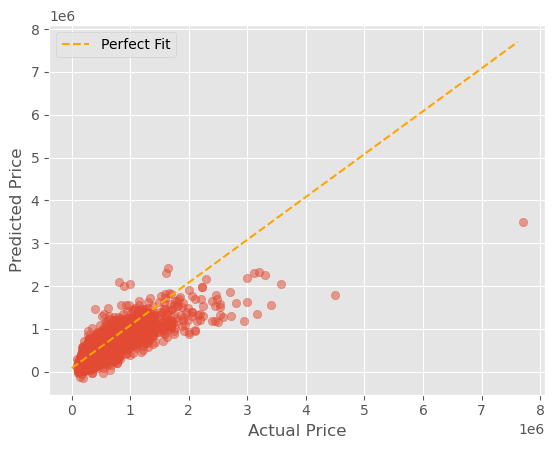

In [42]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test_final.min(), y_test_final.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test_final, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend()
fig.savefig('./images/linearity');

We have some outliers, but in general it looks like we have a linear relationship between the actual price and the predicted price (not violating this assumption)

### Investigating Normality
check whether the normality assumption holds for our model by plotting a distribution curve of the residuals using seaborns distplot

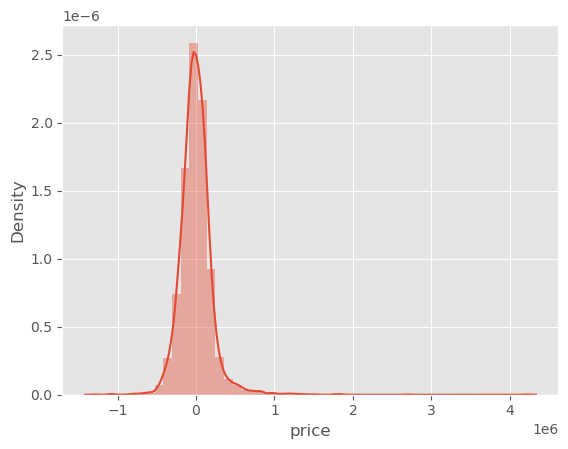

In [52]:
import scipy.stats as stats
residuals = (y_test_final - preds)
fig, axes = plt.subplots()
sns.distplot(residuals)
fig.savefig('./images/normality');


We can notice some outliers, but we can say that the data is relatively normal

### Investigating Multicollinearity (Independence Assumption)
We measure multicollinearity with variance inflation factor. A "rule of thumb" for VIF is that 5 is too high (i.e. strong multicollinearity).

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

bedrooms        22.206483
bathrooms       24.618493
sqft_living     24.593274
sqft_lot         1.186860
floors          13.266779
condition       29.589197
grade          123.630312
yr_built       123.257248
waterfront       1.029062
Name: Variance Inflation Factor, dtype: float64

All the features except sqft_lot, waterfront have their variance Inflation factor way above 5. We therefore a very high multicollinearity in our features.

### Investigating Homoscedasticity
check whether the model's minimized errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity by plotting predictions against the residuals

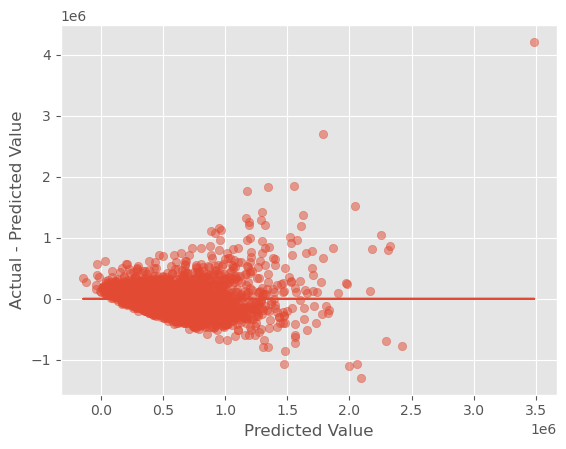

In [45]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test_final))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value")
fig.savefig('./images/homoscedasticity');

The plot forms a close to perfect funnel shape, around the residual and prediction values, hence obeying the homoscedacity assumption


### Linear Regression Assumptions Summary
We can be confident in our model coefficients since the only assumption being violeted is multicollinearity, which sometimes in actual sense each feature could be having an effect on the house price in King County. We can use this model for both inferential and predictive purposes.



### Conclusion

The variables that will affect the price change of each house unit in Northwestern county are the number of bedrooms, number of bathrooms, sqft_living, floors, waterfront, condition, grade, yr_built  with an RMSE(Root Mean Squared Error) value of $ 216596.78. From final model interpretation,we see that 
Older houses and number of bedrooms have a negative change in price. While number of bathrooms, sqft_living, floors, waterfront, condition, grade have a positive impact on the price. 





### Recommendations


1. Older houses can be renovated to include feaatures such as waterfront because each house unit that has a waterfront equals to the a price increace of  $ 787274.58.

2. Home owners should build more houses that have more than one floor since the value price increment  for each house is quite high -approximately $ 127477.49

3. The unit area change  of the living room also affects the price by 182.74. Home owners should build houses that have larder living areas inorder to increase the house price.

4. The overall condition change of the house constitutes $ 17830.20 price increase. Home owners should look for means to improve the overall condition of the house by perhaps reparing bathrooms or even increasing the number of the bathrooms in the house

5. Home owners should also seek to change the real estate grading of their houses if possible since an upward change in the grade of the house increases the house price by $ 127477.48

    


